## Observations and Insights 

Conclusions on the Capomulin regimen:
- Mice under the Capomulin regimen have the second lowest average tumor volume.
- In the case of s185's treatment, Capomulin decreases the volume of a tumor overtime by approximately 22 mm3.
- There is a positive correlation between mouse weight and average tumor volume (mm3) in the mice treated under the Capolulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df= pd.merge(study_results, mouse_metadata, how="left")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#preliminary exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
df.shape

(1893, 8)

In [4]:
# Checking the number of mice.
num_mice1= df["Mouse ID"].nunique()
print(f"The number of mice is {num_mice1}.")

The number of mice is 249.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"]== "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2= df.loc[mask]
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
#Check to see if there are any more duplicates
df2.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice2= df2["Mouse ID"].nunique()
print(f"The number of mice is {num_mice2}.")

The number of mice is 248.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = df2.groupby(["Drug Regimen"]).mean()
median = df2.groupby(["Drug Regimen"]).median()
variance = df2.groupby(["Drug Regimen"]).var()
stDev= df2.groupby(["Drug Regimen"]).std()
sem= df2.groupby(["Drug Regimen"]).sem()

sumStat1 = pd.DataFrame()
sumStat1["mean"] = mean["Tumor Volume (mm3)"]
sumStat1["median"] = median["Tumor Volume (mm3)"]
sumStat1["variance"] = variance["Tumor Volume (mm3)"]
sumStat1["standard_dev"] = stDev["Tumor Volume (mm3)"]
sumStat1["SEM"] = sem["Tumor Volume (mm3)"]
sumStat1


,mean,median,variance,standard_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

sumStats2 = df2.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
sumStats2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

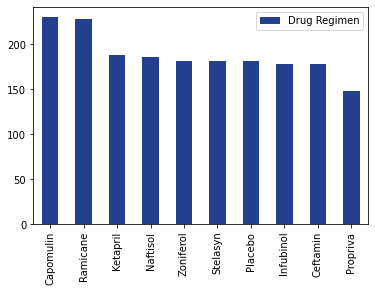

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg = pd.DataFrame(df2["Drug Regimen"].value_counts())  #make calculation and turn series into dataframe
drug_reg.plot(kind="bar", facecolor="#23408e")

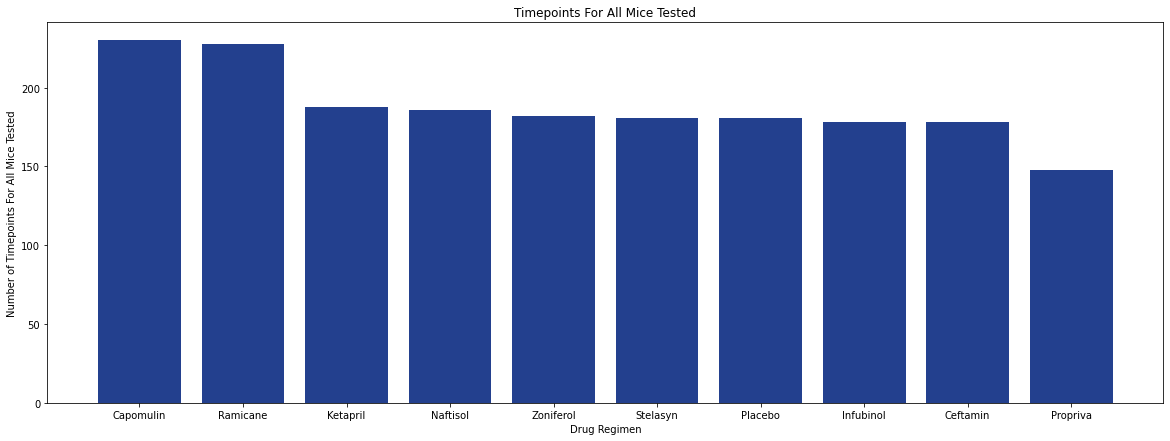

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(20,7))
plt.bar(drug_reg.index, drug_reg["Drug Regimen"], color="#23408e", align="center")

# Set a Title and labels
plt.title("Timepoints For All Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints For All Mice Tested")


plt.show()

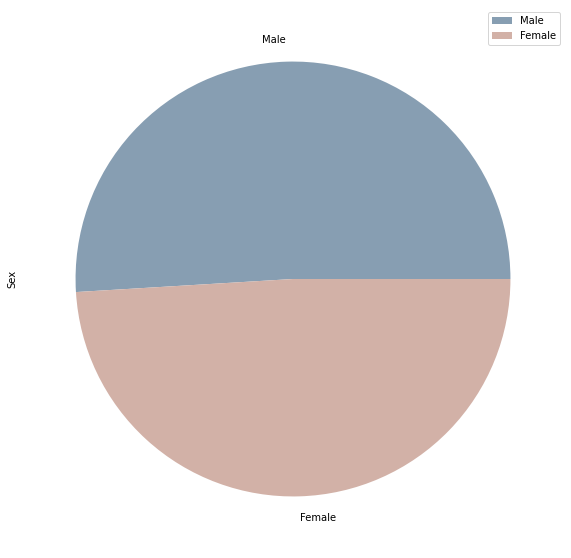

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_mnf = pd.DataFrame(df2.Sex.value_counts())

pie = mouse_mnf.plot.pie(subplots=True, figsize=(10, 10), colors=["#879eb2","#d2b1a7"])

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html


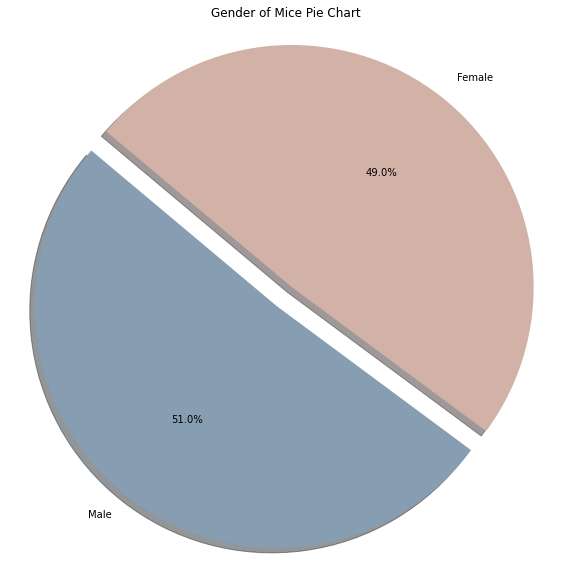

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["#879eb2","#d2b1a7"]
explode = (0.1,0)

#figure size
plt.figure(figsize=(10,10))

#pie chart
plt.pie(mouse_mnf.Sex, explode=explode, labels=mouse_mnf.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#title
plt.title("Gender of Mice Pie Chart")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
#grouped DataFrame of the greatest time point for each mouse
#https://www.statology.org/max-by-group-in-pandas/
tumor_vol = df2.groupby(["Mouse ID"]).Timepoint.max().reset_index()
tumor_vol

#merge with orginal dataframe

tumor_df = pd.merge(df2, tumor_vol, on=["Mouse ID", "Timepoint"],how="inner") 
tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
#filter DF for drugs under review
#https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values

drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = tumor_df["Drug Regimen"].isin(drugs)
tumor_df_fin= tumor_df.loc[mask]
tumor_df_fin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
234,a644,45,32.978522,1,Ramicane,Female,7,17
240,i177,45,33.562402,3,Ramicane,Male,10,18
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17


In [28]:
# data analysis

tumor_df_fin.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["min", "max"]})

Tumor Volume (mm3)           
                            min        max
Drug Regimen                              
Capomulin             23.343598  47.685963
Ceftamin              45.000000  68.923185
Infubinol             36.321346  72.226731
Ramicane              22.050126  45.220869

In [19]:
# data analysis (Matplotlib day 3, activity 2 referenced)

lower_bounds = []
upper_bounds = []
range_drugs =[]

for drug in drugs:
    
    mask= tumor_df_fin["Drug Regimen"]== drug #make DF for drug to make calculations
    drug_df = tumor_df_fin.loc[mask]
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
    range_drugs.append(iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    #identify any outliers
    
    mask = (drug_df["Tumor Volume (mm3)"]> upper_bound) | (drug_df["Tumor Volume (mm3)"]< lower_bound)
    outlier = drug_df.loc[mask]
    
    #https://datatofish.com/pandas-dataframe-empty/
    if outlier.empty==False:
        print(outlier)
    else:
        print(f"No outliers for {drug}.")
        

drugs_df = pd.DataFrame()
drugs_df["Drug"]= drugs
drugs_df["Lower Bound"]= lower_bounds
drugs_df["Upper Bound"]= upper_bounds
drugs_df["IQR"] = range_drugs

drugs_df


No outliers for Capomulin.
No outliers for Ramicane.
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
20  Female          18          25  
No outliers for Ceftamin.


,Drug,Lower Bound,Upper Bound,IQR
0,Capomulin,20.704562,51.832015,7.781863
1,Ramicane,17.912664,54.306811,9.098537
2,Infubinol,36.832905,82.741446,11.477135
3,Ceftamin,25.355450,87.666458,15.577752


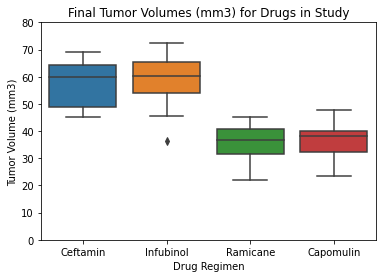

In [30]:
# graph data in box plots-- outliers shown as diamond
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=tumor_df_fin)

plt.title("Final Tumor Volumes (mm3) for Drugs in Study")

#set axis at 0
plt.ylim(0, 80)


# show plot
plt.show()

## Line and Scatter Plots

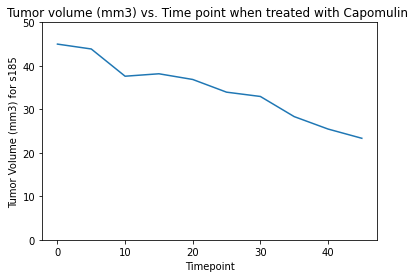

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mask= df2["Mouse ID"] == "s185"  #mouse that was treated with Capomulin
mouse_df= df2.loc[mask]

#make line plot for s185
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])

plt.title('Tumor volume (mm3) vs. Time point when treated with Capomulin ')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3) for s185')

#set axis at 0
plt.ylim(0, 50)

plt.show()


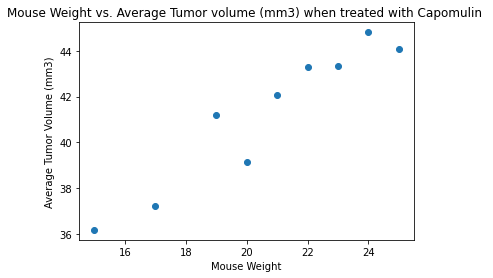

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#find average tumor volume by mouse weight
mask= df2["Drug Regimen"] == "Capomulin"
capomulin_df= df2.loc[mask]
weight_df= capomulin_df. groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

#make scatter plot
plt.scatter(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])

#axis titles
plt.title('Mouse Weight vs. Average Tumor volume (mm3) when treated with Capomulin ')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

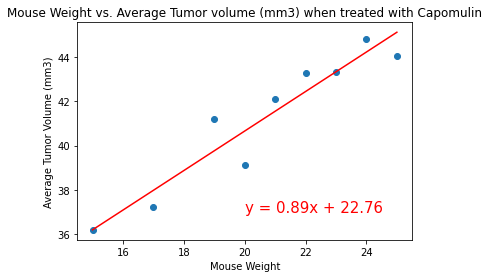

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = weight_df["Weight (g)"]
y_values = weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor volume (mm3) when treated with Capomulin')
plt.show()


Resouces used:
https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/#
https://www.color-hex.com/color-palette/42381
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
https://www.statology.org/max-by-group-in-pandas/
https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://datatofish.com/pandas-dataframe-empty/